"""
 About the Data set :-
 
 Employee_Attrition

Attrition of employees if not predicted correctly can lead to losing 
valuable people, resulting in reduced efficiency of the organisation, 
reduced morale among team members etc
Hence it is necessary to correctly predict which employee is likely to leave
"""

In [ ]:
#Attrition - the target variable (Dependent Variable).

#All other columns are independent variable, which can be responsible for Attrition.

Assignment:-
    (A)Preprocessing-
    (1)Handling  Missing value-- Apply Imputation and Drop approach.
    (2)Outlier treatment- apply trimming and capping approach
    (3)label_Encoding/astype approach.
    (4)One_hot encoding approach

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Kriti\Practice Datasets\Practice Datasets\HR_Employee_Attrition_Data.csv")


In [3]:
#Data Exploration
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Set to view all the columns of the dataset

pd.set_option('display.max_columns', 100)


df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,1,Female,60,3,3,Research Director,3,Married,13549,24001,9,Y,No,12,3,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,Y,No,21,4,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,2,Male,43,3,2,Sales Executive,3,Married,4221,8863,1,Y,No,15,3,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
df1=df.copy()

In [11]:
df1.dropna(inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Removal of outliers by trimming method:

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:>

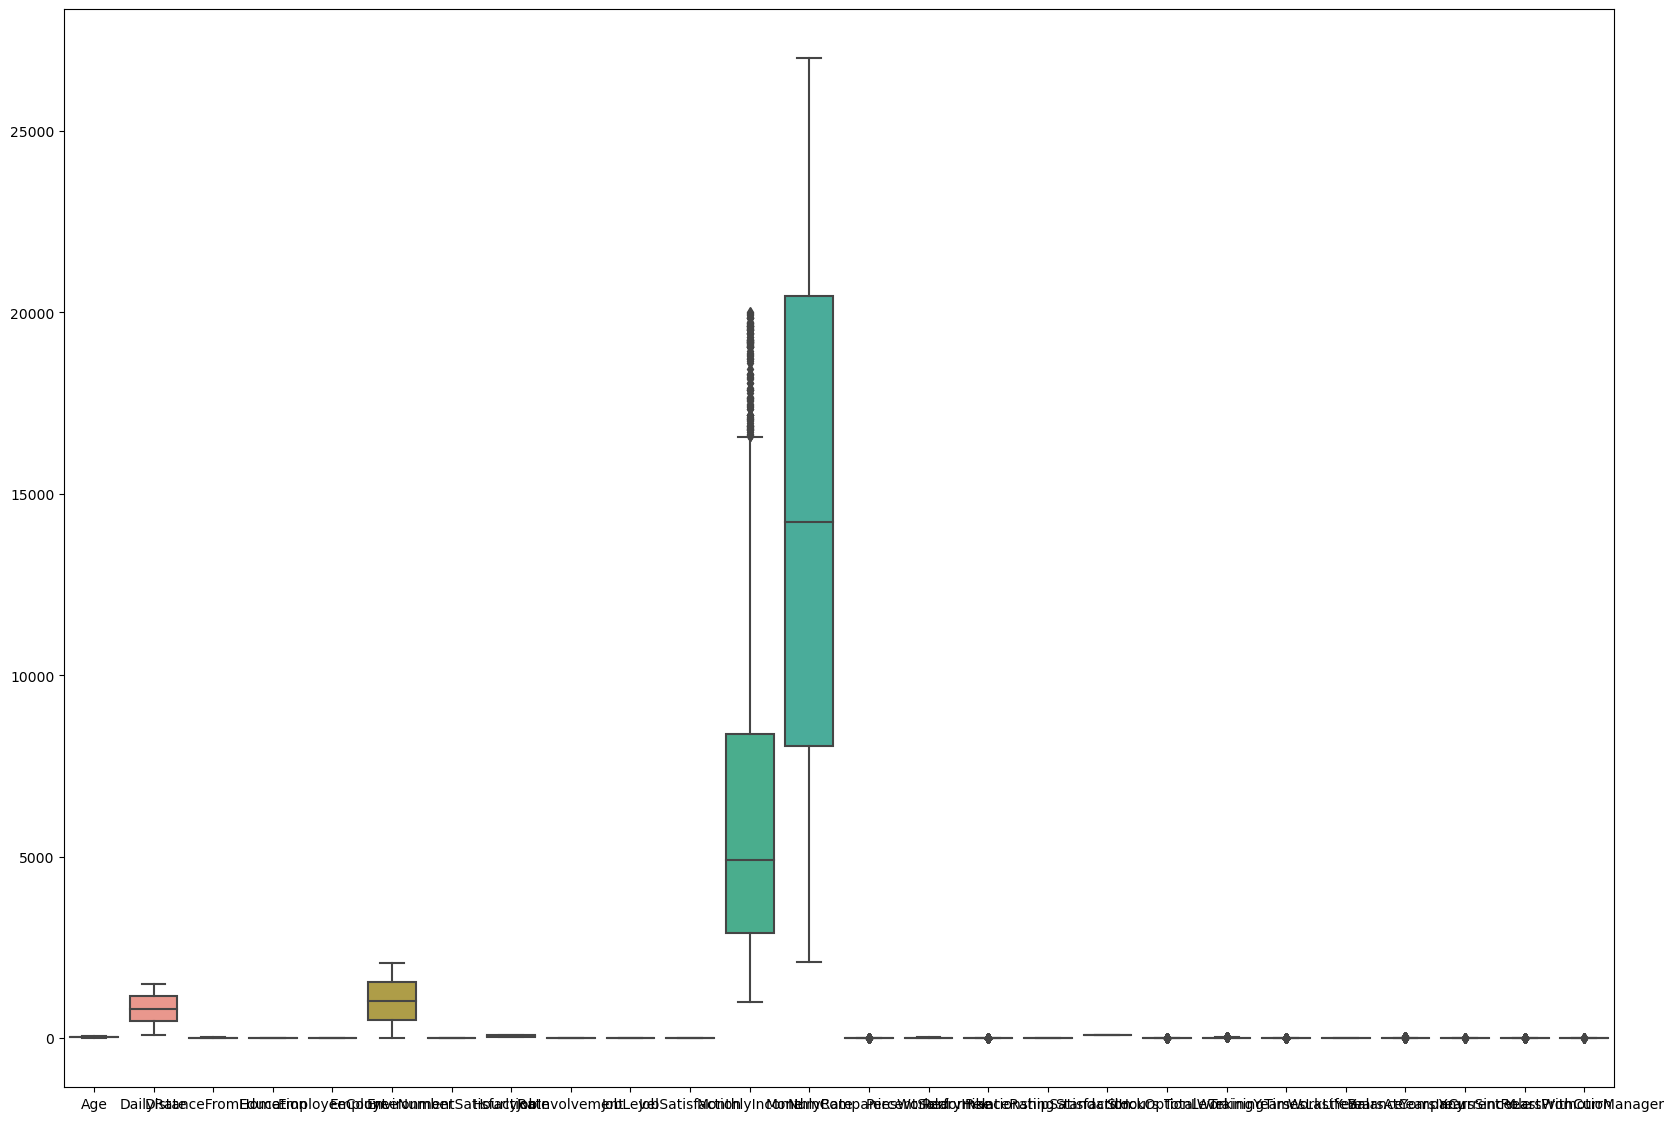

In [14]:
plt.figure(figsize=(20,14))
sns.boxplot(data=df1)

In [15]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper_fence \n",Upper_fence)
print("lower fence \n",Lower_fence)

Upper_fence 
 Age                            62.500
DailyRate                    2195.000
DistanceFromHome               32.000
Education                       7.000
EmployeeCount                   1.000
EmployeeNumber               3152.500
EnvironmentSatisfaction         7.000
HourlyRate                    137.375
JobInvolvement                  4.500
JobLevel                        6.000
JobSatisfaction                 7.000
MonthlyIncome               16581.000
MonthlyRate                 39083.250
NumCompaniesWorked              8.500
PercentSalaryHike              27.000
PerformanceRating               3.000
RelationshipSatisfaction        7.000
StandardHours                  80.000
StockOptionLevel                2.500
TotalWorkingYears              28.500
TrainingTimesLastYear           4.500
WorkLifeBalance                 4.500
YearsAtCompany                 18.000
YearsInCurrentRole             14.500
YearsSinceLastPromotion         7.500
YearsWithCurrManager           14.50

In [16]:
df2=df1[~((df1<Lower_fence)|(df1>Upper_fence)).any(axis=1)]

C:\Users\Kriti\AppData\Local\Temp\ipykernel_14492\2367506421.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df1[~((df1<Lower_fence)|(df1>Upper_fence)).any(axis=1)]
C:\Users\Kriti\AppData\Local\Temp\ipykernel_14492\2367506421.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df1[~((df1<Lower_fence)|(df1>Upper_fence)).any(axis=1)]


In [17]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,803.163030,9.428755,2.890886,1.0,1038.517330,2.727856,66.060334,2.740693,1.750963,2.702182,5099.204108,14246.043646,2.444159,14.152760,3.0,2.699615,80.0,0.666239,8.956354,2.522465,2.752246,5.391528,3.563543,1.422336,3.512195
std,8.556548,401.254015,8.179603,1.020185,0.0,598.193343,1.080504,20.509768,0.711293,0.751765,1.102058,2869.827193,6925.500621,2.211306,2.453375,0.0,1.086083,0.0,0.694471,5.249130,0.754044,0.716303,3.650824,3.029335,1.971536,3.047320
min,18.000000,103.000000,1.000000,1.000000,1.0,4.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2097.000000,0.000000,11.000000,3.0,1.000000,80.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,468.500000,2.000000,2.000000,1.0,507.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2796.000000,8404.000000,1.000000,12.000000,3.0,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,34.000000,809.000000,7.000000,3.000000,1.0,1018.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4448.000000,14255.000000,1.000000,14.000000,3.0,3.000000,80.0,1.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,40.000000,1155.500000,15.000000,4.000000,1.0,1568.500000,4.000000,84.000000,3.000000,2.000000,4.000000,6403.500000,20044.500000,4.000000,16.000000,3.0,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,4.000000,4.000000,16422.000000,26959.000000,8.000000,19.000000,3.0,4.000000,80.0,2.000000,28.000000,4.000000,4.000000,18.000000,14.000000,7.000000,13.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 2 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       779 non-null    int64 
 1   Attrition                 779 non-null    object
 2   BusinessTravel            779 non-null    object
 3   DailyRate                 779 non-null    int64 
 4   Department                779 non-null    object
 5   DistanceFromHome          779 non-null    int64 
 6   Education                 779 non-null    int64 
 7   EducationField            779 non-null    object
 8   EmployeeCount             779 non-null    int64 
 9   EmployeeNumber            779 non-null    int64 
 10  EnvironmentSatisfaction   779 non-null    int64 
 11  Gender                    779 non-null    object
 12  HourlyRate                779 non-null    int64 
 13  JobInvolvement            779 non-null    int64 
 14  JobLevel                 

# Removal of outliers by capping method:

In [19]:
df3=df1.copy()

In [20]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper_fence \n",Upper_fence)
print("lower fence \n",Lower_fence)

Upper_fence 
 Age                            62.500
DailyRate                    2195.000
DistanceFromHome               32.000
Education                       7.000
EmployeeCount                   1.000
EmployeeNumber               3152.500
EnvironmentSatisfaction         7.000
HourlyRate                    137.375
JobInvolvement                  4.500
JobLevel                        6.000
JobSatisfaction                 7.000
MonthlyIncome               16581.000
MonthlyRate                 39083.250
NumCompaniesWorked              8.500
PercentSalaryHike              27.000
PerformanceRating               3.000
RelationshipSatisfaction        7.000
StandardHours                  80.000
StockOptionLevel                2.500
TotalWorkingYears              28.500
TrainingTimesLastYear           4.500
WorkLifeBalance                 4.500
YearsAtCompany                 18.000
YearsInCurrentRole             14.500
YearsSinceLastPromotion         7.500
YearsWithCurrManager           14.50

In [21]:
df3["Age"]=np.where(df3["Age"]>62.500,62.500,np.where(df3["Age"]<10.500,10.500,df3["Age"]))

In [22]:
df3["DailyRate"]=np.where(df3["DailyRate"]>2195.000,2195.000,np.where(df3["DailyRate"]<2,2,df3["DailyRate"]))

In [23]:
df3["DistanceFromHome"]=np.where(df3["DistanceFromHome"]>32.000,32.000,np.where(df3["DistanceFromHome"]<2,2,df3["DistanceFromHome"]))

In [24]:
df3["Education"]=np.where(df3["Education"]>7.000,7.000,np.where(df3["Education"]<0,0,df3["Education"]))

In [25]:
df3["EmployeeCount"]=np.where(df3["EmployeeCount"]>1.000,1.000,np.where(df3["EmployeeCount"]<1.000,1.000,df3["EmployeeCount"]))

In [26]:
df3["EmployeeNumber"]=np.where(df3["EmployeeNumber"]>3152.500,3152.500,np.where(df3["EmployeeNumber"]<1,1,df3["EmployeeNumber"]))

In [27]:
df3["EnvironmentSatisfaction"]=np.where(df3["EnvironmentSatisfaction"]>7.000,7.000,np.where(df3["EnvironmentSatisfaction"]<0,0,df3["EnvironmentSatisfaction"]))

In [28]:
df3["HourlyRate"]=np.where(df3["HourlyRate"]>137.375,137.375,np.where(df3["HourlyRate"]<0,0,df3["HourlyRate"]))

In [29]:
df3["JobInvolvement"]=np.where(df3["JobInvolvement"]>4.500,4.500,np.where(df3["JobInvolvement"]<0,0,df3["JobInvolvement"]))

In [30]:
df3["JobLevel"]=np.where(df3["JobLevel"]>6.000,6.000,np.where(df3["JobLevel"]<0,0,df3["JobLevel"]))

In [31]:
df3["JobSatisfaction"]=np.where(df3["JobSatisfaction"]>7.000,7.000,np.where(df3["JobSatisfaction"]<0,0,df3["JobSatisfaction"]))

In [32]:
df3["MonthlyIncome"]=np.where(df3["MonthlyIncome"]>16581.000,16581.000,np.where(df3["MonthlyIncome"]<0,0,df3["MonthlyIncome"]))

In [33]:
df3["MonthlyRate"]=np.where(df3["MonthlyRate"]>39083.250,39083.250,np.where(df3["MonthlyRate"]<0,0,df3["MonthlyRate"]))

In [34]:
df3["NumCompaniesWorked"]=np.where(df3["NumCompaniesWorked"]>8.500,8.500,np.where(df3["NumCompaniesWorked"]<0,0,df3["NumCompaniesWorked"]))

In [35]:
df3["PercentSalaryHike"]=np.where(df3["PercentSalaryHike"]>27.000,27.000,np.where(df3["PercentSalaryHike"]<3.000,3.000,df3["PercentSalaryHike"]))

In [36]:
df3["PerformanceRating"]=np.where(df3["PerformanceRating"]>3.000,3.000,np.where(df3["PerformanceRating"]<3.000,3.000,df3["PerformanceRating"]))

In [37]:
df3["RelationshipSatisfaction"]=np.where(df3["RelationshipSatisfaction"]>7.000,7.000,np.where(df3["RelationshipSatisfaction"]<0,0,df3["RelationshipSatisfaction"]))

In [38]:
df3["StandardHours"]=np.where(df3["StandardHours"]>80.000,80.000,np.where(df3["StandardHours"]<80.000,80.000,df3["StandardHours"]))

In [39]:
df3["StockOptionLevel"]=np.where(df3["StockOptionLevel"]>2.500,2.500,np.where(df3["StockOptionLevel"]<0,0,df3["StockOptionLevel"]))

In [40]:
df3["TotalWorkingYears"]=np.where(df3["TotalWorkingYears"]>28.500,28.500,np.where(df3["TotalWorkingYears"]<0,0,df3["TotalWorkingYears"]))

In [41]:
df3["TrainingTimesLastYear"]=np.where(df3["TrainingTimesLastYear"]>4.500,4.500,np.where(df3["TrainingTimesLastYear"]<0,0,df3["TrainingTimesLastYear"]))

In [42]:
df3["WorkLifeBalance"]=np.where(df3["WorkLifeBalance"]>4.500,4.500,np.where(df3["WorkLifeBalance"]<0.500,0.500,df3["WorkLifeBalance"]))

In [43]:
df3["YearsAtCompany"]=np.where(df3["YearsAtCompany"]>18.000,18.000,np.where(df3["YearsAtCompany"]<0,0,df3["YearsAtCompany"]))

In [44]:
df3["YearsWithCurrManager"]=np.where(df3["YearsWithCurrManager"]>14.500,14.500,np.where(df3["YearsWithCurrManager"]<0,0,df3["YearsWithCurrManager"]))

In [45]:
df3["YearsSinceLastPromotion"]=np.where(df3["YearsSinceLastPromotion"]>7.500,7.500,np.where(df3["YearsSinceLastPromotion"]<0,0,df3["YearsSinceLastPromotion"]))

In [46]:
df3["YearsInCurrentRole"]=np.where(df3["YearsInCurrentRole"]>14.500,14.500,np.where(df3["YearsInCurrentRole"]<0,0,df3["YearsInCurrentRole"]))

In [47]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.334014,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6361.891837,14313.103401,2.675510,15.209524,3.0,2.712245,80.0,0.764966,11.103061,2.692517,2.761224,6.617687,4.207823,1.922789,4.107483
std,9.135373,403.509100,7.970119,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4353.345470,7117.786044,2.454656,3.659938,0.0,1.081209,0.0,0.782312,7.303828,1.080497,0.706476,4.989788,3.555335,2.478222,3.517487
min,18.000000,102.000000,2.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.0,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.0,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.0,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.0,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,16581.000000,26999.000000,8.500000,25.000000,3.0,4.000000,80.0,2.500000,28.500000,4.500000,4.000000,18.000000,14.500000,7.500000,14.500000


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

 # as type function approach

In [49]:
df4=df1.copy()

In [50]:
df4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [51]:
df4["BusinessTravel"]=df4["BusinessTravel"].astype("category")

In [52]:
df4["BusinessTravel"]=df4["BusinessTravel"].cat.codes

In [53]:
df4["Department"]=df4["Department"].astype("category").cat.codes

In [54]:
df4["EducationField"]=df4["EducationField"].astype("category").cat.codes

In [55]:
df4["JobRole"]=df4["JobRole"].astype("category").cat.codes

In [56]:
df4["MaritalStatus"]=df4["MaritalStatus"].astype("category").cat.codes

In [57]:
df4["Gender"]=df4["Gender"].astype("category").cat.codes

In [58]:
df4["Attrition"]=df4["Attrition"].astype("category").cat.codes

In [59]:
df4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# One_hot encoding approach

In [60]:
df5=df1.copy()

In [61]:
df5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [62]:
df5=pd.get_dummies(df5,columns=["Department","EducationField"],prefix=["Dept","Edu_Field"])

In [63]:
df5.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept_Human Resources,Dept_Research & Development,Dept_Sales,Edu_Field_Human Resources,Edu_Field_Life Sciences,Edu_Field_Marketing,Edu_Field_Medical,Edu_Field_Other,Edu_Field_Technical Degree
0,41,Yes,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0
1,49,No,Travel_Frequently,279,8,1,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0
2,37,Yes,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0
4,27,No,Travel_Rarely,591,2,1,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0


# Data Analysis

In [64]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [65]:
df1=df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [66]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [67]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [68]:
df1.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

In [69]:
df1.duplicated().sum()

0

<AxesSubplot:ylabel='Age'>

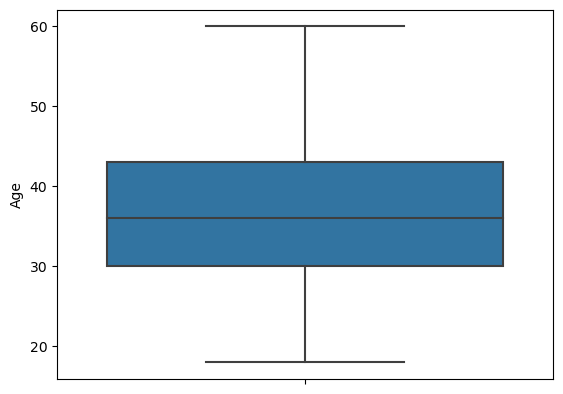

In [70]:
sns.boxplot(y=df1["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

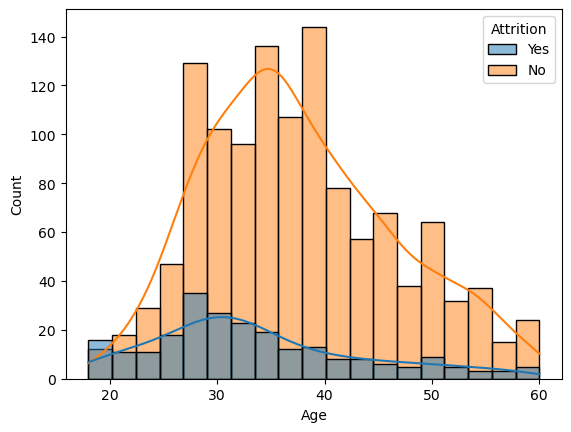

In [71]:
sns.histplot(x="Age",data=df1,kde=True,hue="Attrition")


- As per above graph, the count of those employes are high who are fall between age group of 28 to 50 yeras old

Text(0.5, 1.0, 'Percentage distribution')

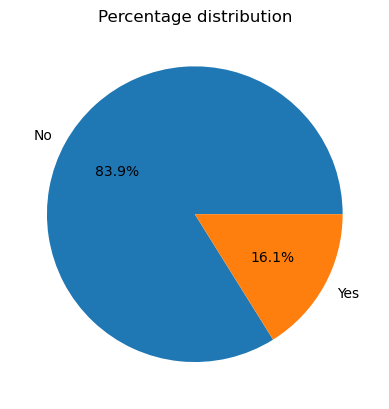

In [72]:
plt.pie(x=df1['Attrition'].value_counts(),labels=df1['Attrition'].value_counts().index,autopct='%0.1f%%',data=df1)
plt.title('Percentage distribution')

Text(0.5, 1.0, 'Percentage distribution of Business Travel')

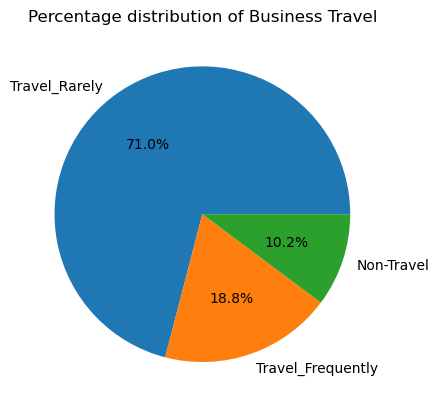

In [73]:
plt.pie(x=df1['BusinessTravel'].value_counts(),labels=df1['BusinessTravel'].value_counts().index,autopct='%0.1f%%',data=df1)
plt.title('Percentage distribution of Business Travel')

- 10.2% of employes are under non-travel category, who sit in the office and doing there work.
- Meanwhile 18.8% of employes needs to travel frequently for business work.
- Whereas 71% of employes are travel very rarely as per business requirement.

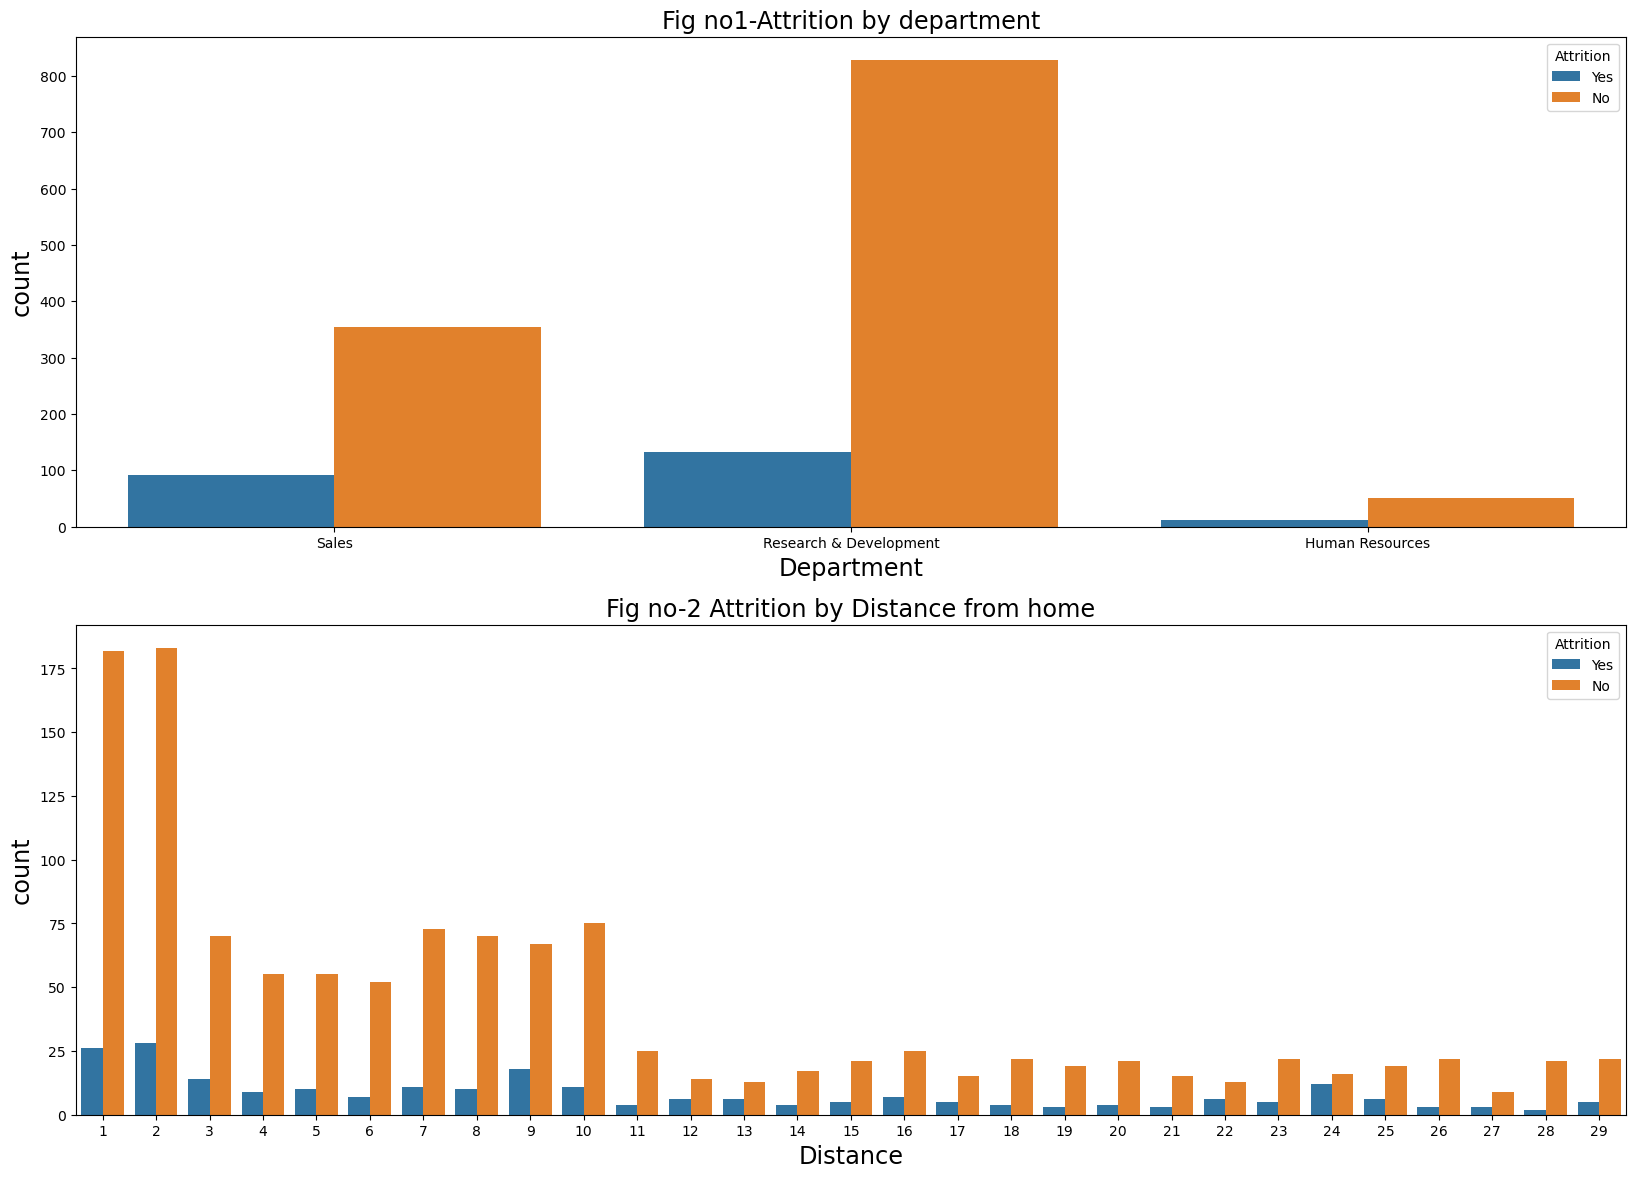

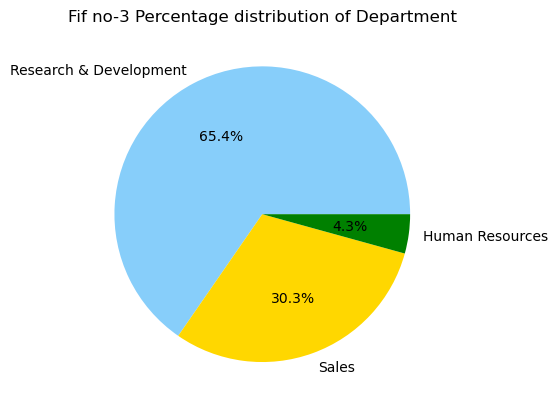

In [74]:
plt.subplots(2,1,figsize=(20,14))

plt.subplot(2,1,1)
sns.countplot(x='Department',data=df1,hue='Attrition')
plt.title('Fig no1-Attrition by department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Department',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,1,2)
sns.countplot(x='DistanceFromHome',data=df1,hue='Attrition')
plt.title('Fig no-2 Attrition by Distance from home',fontdict={'fontsize':'xx-large'})
plt.xlabel('Distance',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})
plt.show()

# Percentage of department distribution
plt.pie(x=df1['Department'].value_counts(),labels=df1['Department'].value_counts().index,autopct='%0.1f%%',colors=['lightskyblue','gold','green'],data=df1)
plt.title('Fif no-3 Percentage distribution of Department')
plt.show()

- As per Fig no-1, the maximum numbers of employes are in the department of Research & Developement.
- As per Fig no-3, 65.4% of employes are in Research & Development, 30.3% employes are in sales and 4.3% employes are in Human
  Resources departments.
- As per Fig no-2, those employes who have more distance from home to office are one of the reson to leave job due to travel       issues.

In [75]:
df1.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

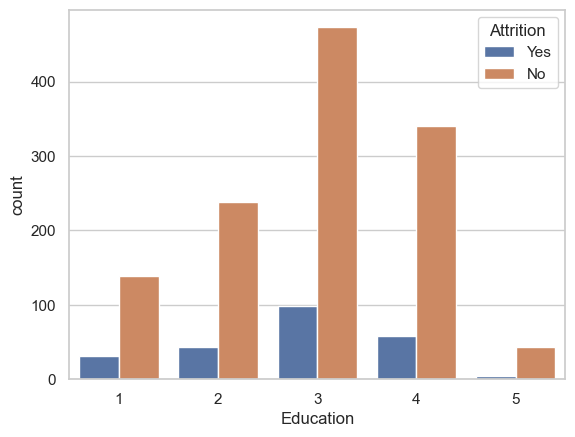

In [76]:
sns.set_theme(style='whitegrid')
sns.countplot(x='Education',hue='Attrition',data=df1)

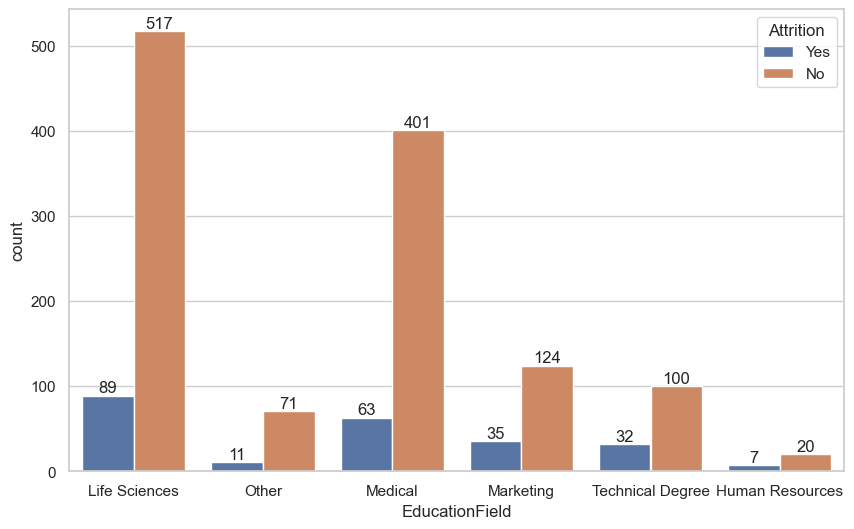

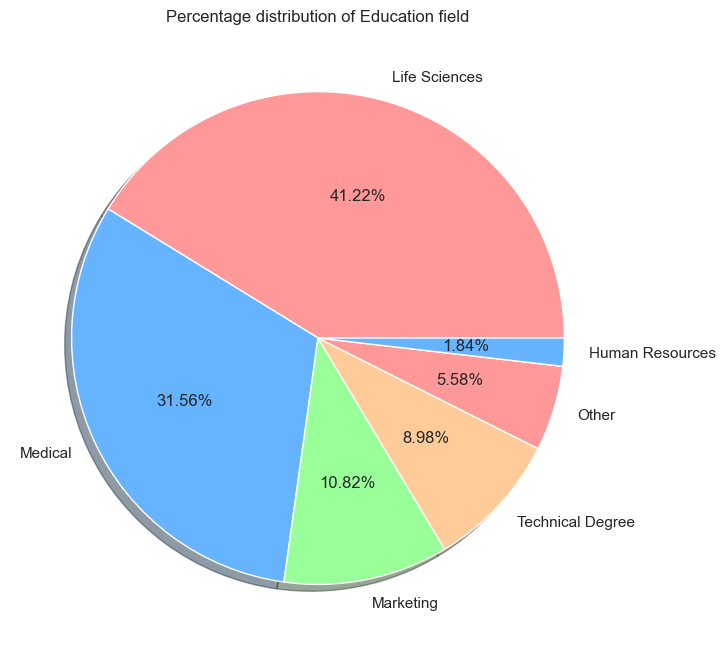

In [77]:
plt.figure(figsize=(10,6),dpi=100)
a=sns.countplot(x='EducationField',hue='Attrition',data=df1)

for i in a.containers:
    a.bar_label(i)

plt.show()

# Percentage distribution of Education field

plt.figure(figsize=(8,8))
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=df1['EducationField'].value_counts(),labels=df1['EducationField'].value_counts().index,autopct='%0.2f%%',colors=colors,shadow=True,data=df1)
plt.title('Percentage distribution of Education field')
plt.show()

- 41.22% employes are from Life Sciences background.
- 31.56% employes are from Medical back ground.
- And rest of the employes are from Marketing (10.82%), Technical Degree (8.98%), Other (5.58%) and Human Resources (1.84%) 
  background.
- Those employes who are coming from Life Science & Medical Education background has high count values as compare to others to 
  leave job as per above graphical analysis.

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Count'>

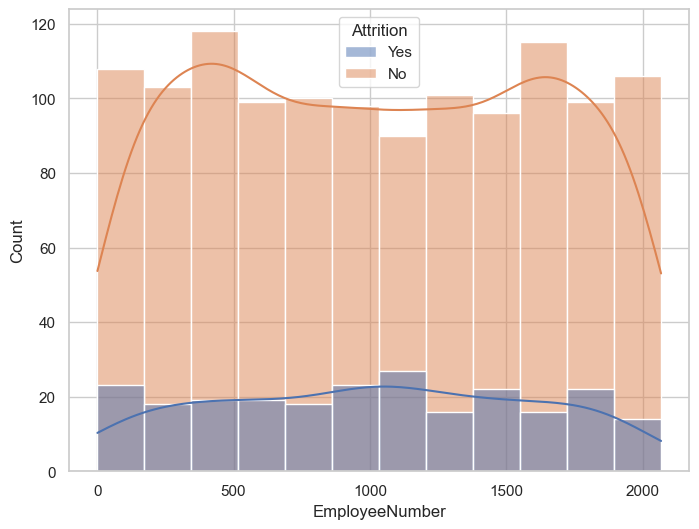

In [78]:
plt.figure(figsize=(8,6),dpi=100)
sns.histplot(x="EmployeeNumber",data=df1,kde=True,hue="Attrition",color="lightblue")

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

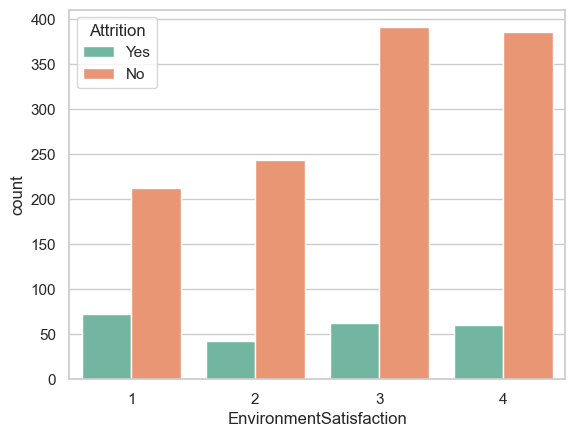

In [79]:
sns.set_theme(style='whitegrid')
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df1,palette='Set2')

- Enviroment satisfaction is a key factor to leave job.
- As per above analysis it is clear on of the reason of employees to leave job.

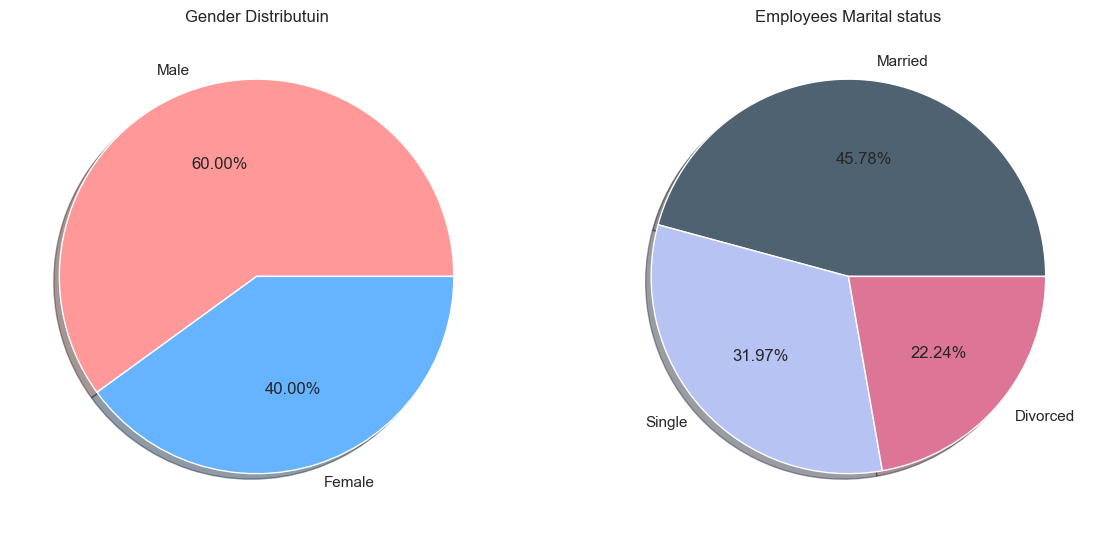

In [80]:
# Percentage of Male & Female Employees

plt.subplots(1,2,figsize=(14,16))

plt.subplot(1,2,1)
colors=['#ff9999','#66b3ff']
plt.pie(x=df1['Gender'].value_counts(),labels=df1['Gender'].value_counts().index,autopct='%0.2f%%',colors=colors,shadow=True,data=df1)
plt.title('Gender Distributuin')

plt.subplot(1,2,2)
colors=['#4F6272','#B7C3F3','#DD7596']
plt.pie(x=df1['MaritalStatus'].value_counts(),labels=df1['MaritalStatus'].value_counts().index,autopct='%0.2f%%',colors=colors,shadow=True,data=df1)
plt.title('Employees Marital status')
plt.show()


- 60% are male employees and 40% are female employees whereas 45.78% are mrried employees, 31.97% are single employees and         22.24% are divorced employees.

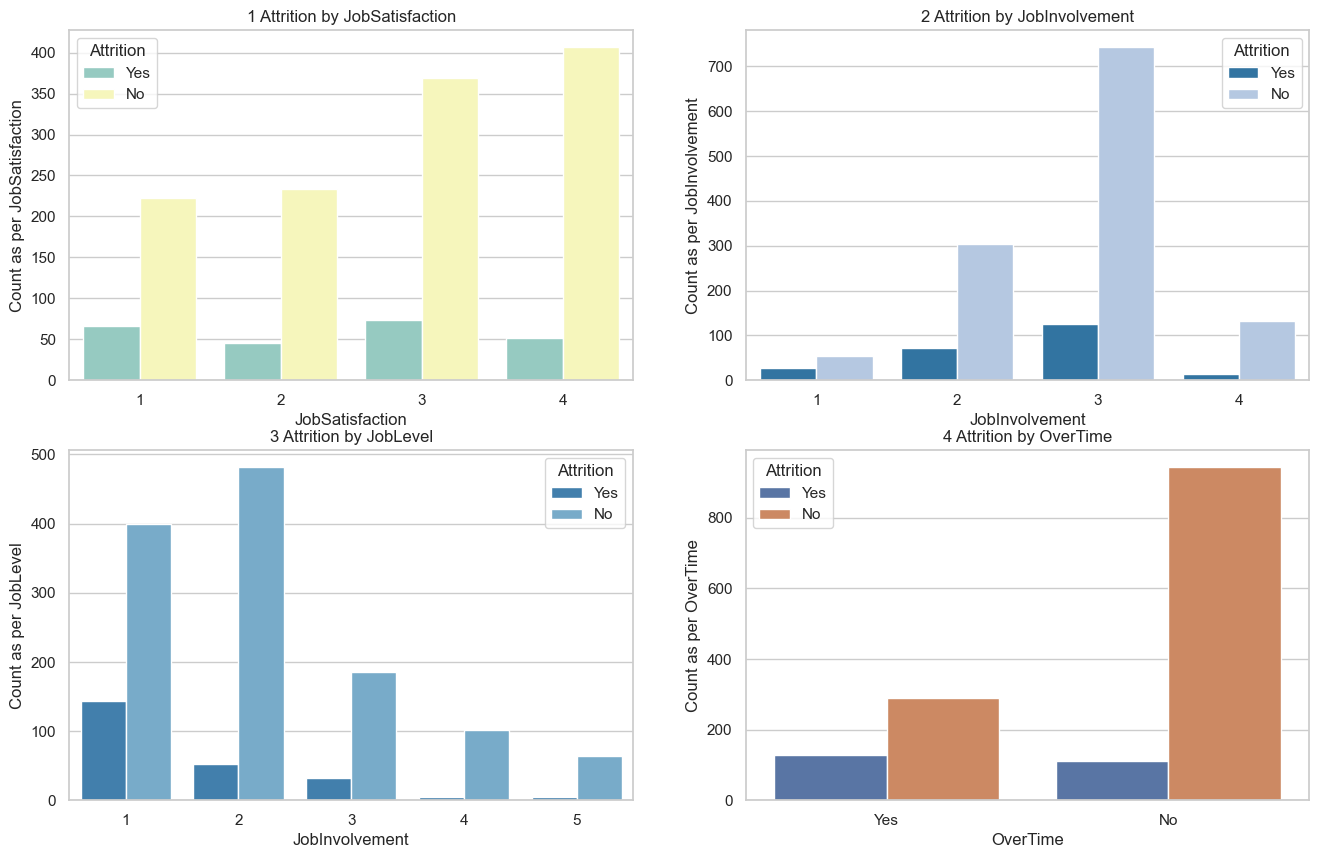

In [81]:
plt.subplots(2,2,figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df1,palette='Set3')
plt.title('1 Attrition by JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count as per JobSatisfaction')

plt.subplot(2,2,2)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df1,palette='tab20')
plt.title('2 Attrition by JobInvolvement')
plt.xlabel('JobInvolvement')
plt.ylabel('Count as per JobInvolvement')

plt.subplot(2,2,3)
sns.countplot(x='JobLevel',hue='Attrition',data=df1,palette='tab20c')
plt.title('3 Attrition by JobLevel')
plt.xlabel('JobInvolvement')
plt.ylabel('Count as per JobLevel')

plt.subplot(2,2,4)
sns.countplot(x='OverTime',hue='Attrition',data=df1)
plt.title('4 Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count as per OverTime')


plt.show()

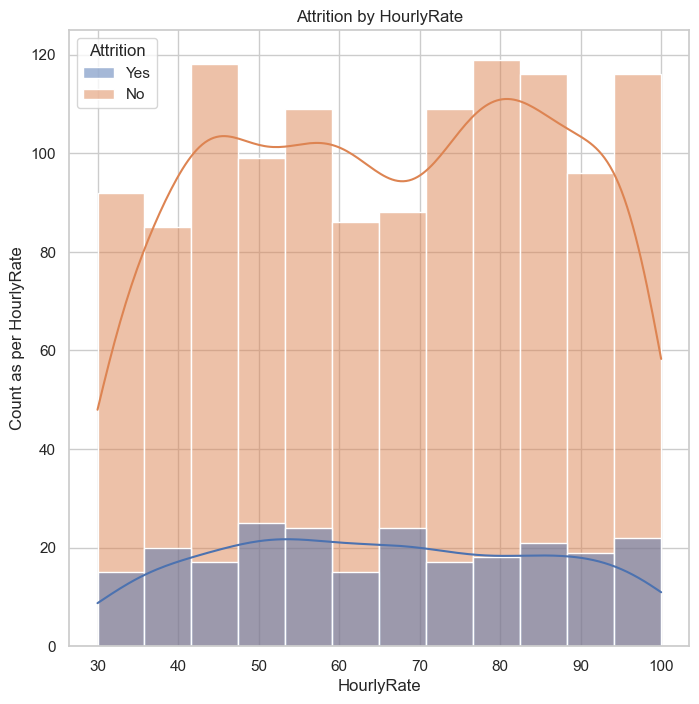

In [82]:
plt.figure(figsize=(8,8))
sns.histplot(x="HourlyRate",data=df1,kde=True,hue="Attrition")
plt.xlabel('HourlyRate')
plt.ylabel('Count as per HourlyRate')
plt.title('Attrition by HourlyRate')
plt.show()

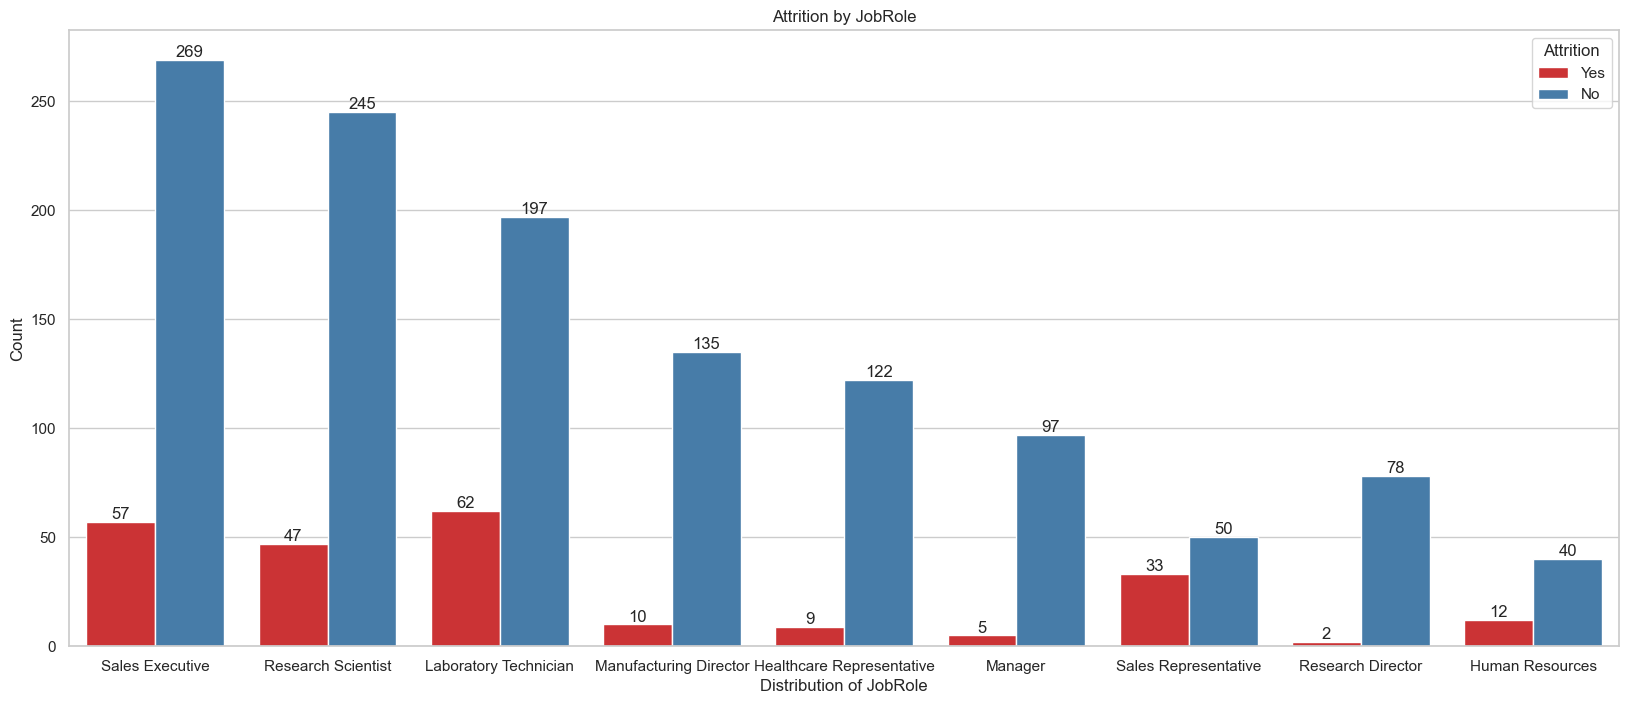

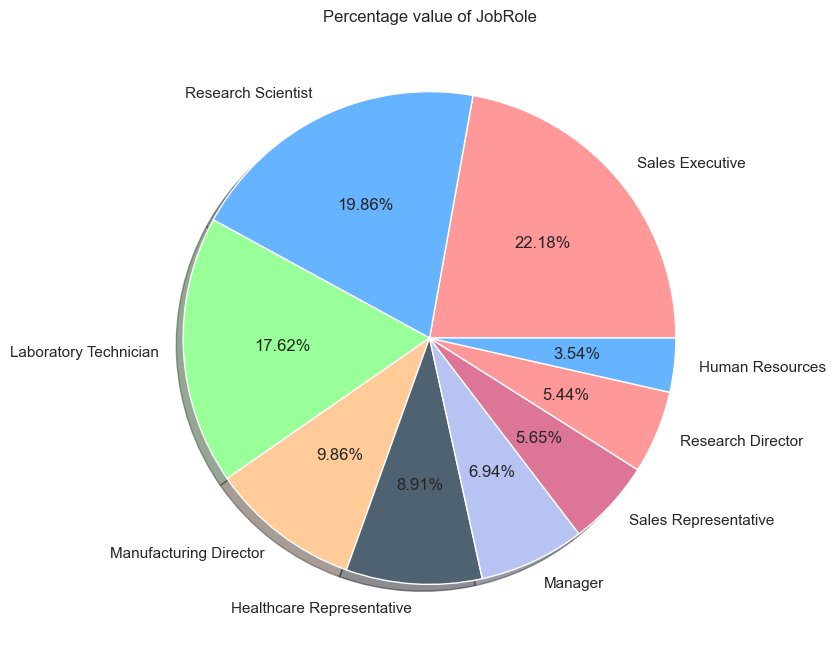

In [83]:

plt.figure(figsize=(20,8),dpi=100)
a=sns.countplot(x='JobRole',hue='Attrition',data=df1,palette='Set1')
plt.title('Attrition by JobRole')
plt.xlabel('Distribution of JobRole')
plt.ylabel('Count')

for i in a.containers:
    a.bar_label(i)

plt.show()

# Percentage value of JobRole

plt.figure(figsize=(8,8))
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#4F6272','#B7C3F3','#DD7596']
plt.pie(x=df1['JobRole'].value_counts(),labels=df1['JobRole'].value_counts().index,autopct='%0.2f%%',colors=colors,shadow=True,data=df1)
plt.title('Percentage value of JobRole')
plt.show()

- As per above analysis the highest numbers of employee counts under the job role of Sales Executive, Research Sceintist and 
  Laboratory Technician.
- The above percentage distribution among all the job roles are followsas:
    > 22.18% epmloyees are from Sales Executive job role
    > 19.86% epmloyees are from Research Scientist job role
    > 17.62% epmloyees are from Laboratory Technician job role
    > 9.86% epmloyees are from Manufacturing Director job role
    > 8.91% epmloyees are from Healthcare Representative job role
    > 6.94% employees are Manager
    > 5.65% employees are Sales Representative
    > 5.44% employees are Research Director
    > 3.54% employees are from Human Resources profile
    

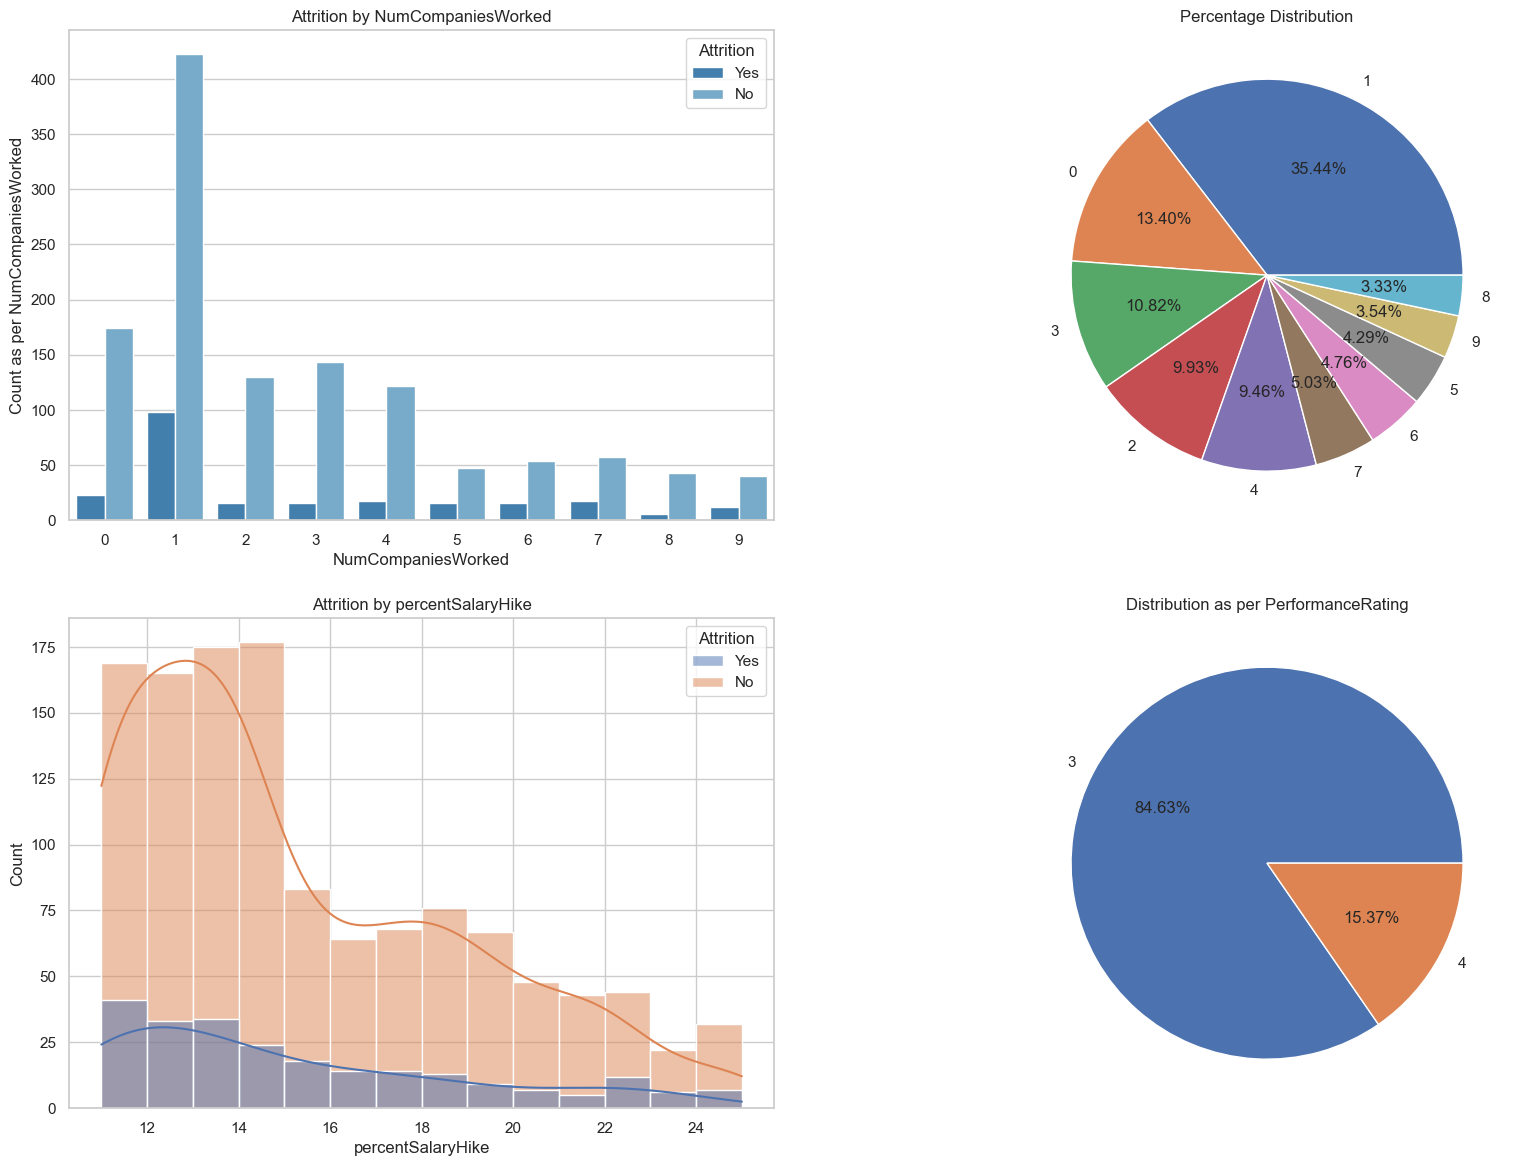

In [84]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df1,palette='tab20c')
plt.title('Attrition by NumCompaniesWorked')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count as per NumCompaniesWorked')

plt.subplot(2,2,2)
plt.pie(x=df1['NumCompaniesWorked'].value_counts(),labels=df1['NumCompaniesWorked'].value_counts().index,autopct='%0.2f%%',data=df1)
plt.title('Percentage Distribution')

plt.subplot(2,2,3)
sns.histplot(x="PercentSalaryHike",data=df1,kde=True,hue="Attrition")
plt.title('Attrition by percentSalaryHike')
plt.xlabel('percentSalaryHike')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.pie(x=df1['PerformanceRating'].value_counts(),labels=df1['PerformanceRating'].value_counts().index,autopct='%0.2f%%',data=df1)
plt.title('Distribution as per PerformanceRating')

plt.show()


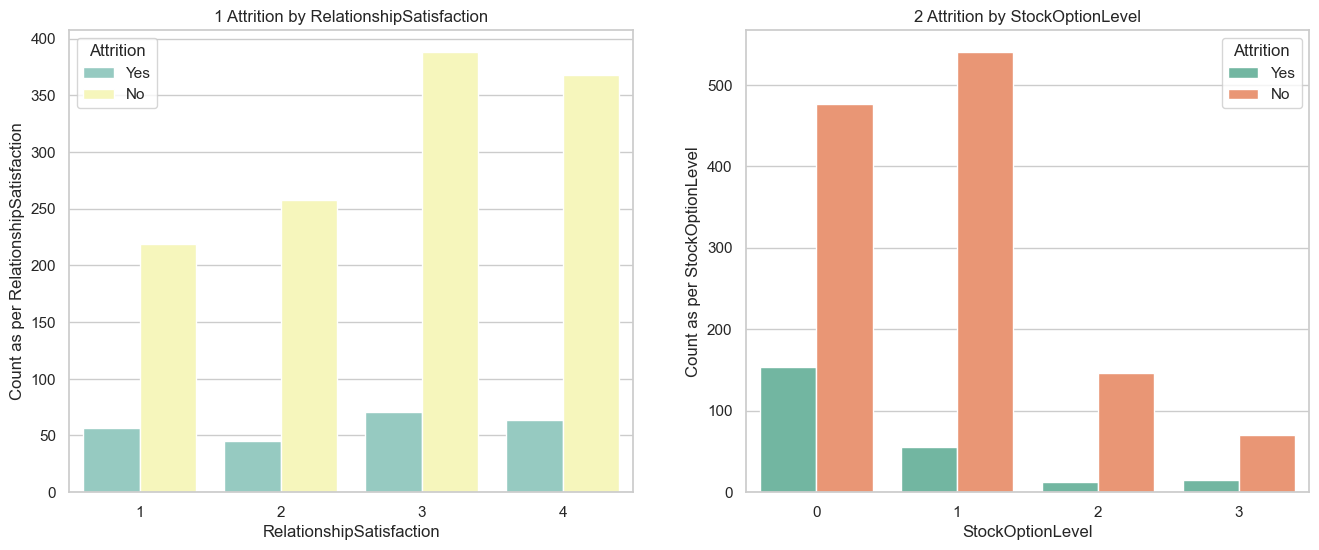

In [85]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df1,palette='Set3')
plt.title('1 Attrition by RelationshipSatisfaction')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Count as per RelationshipSatisfaction')

plt.subplot(1,2,2)
sns.countplot(x='StockOptionLevel',hue='Attrition',data=df1,palette='Set2')
plt.title('2 Attrition by StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count as per StockOptionLevel')

plt.show()


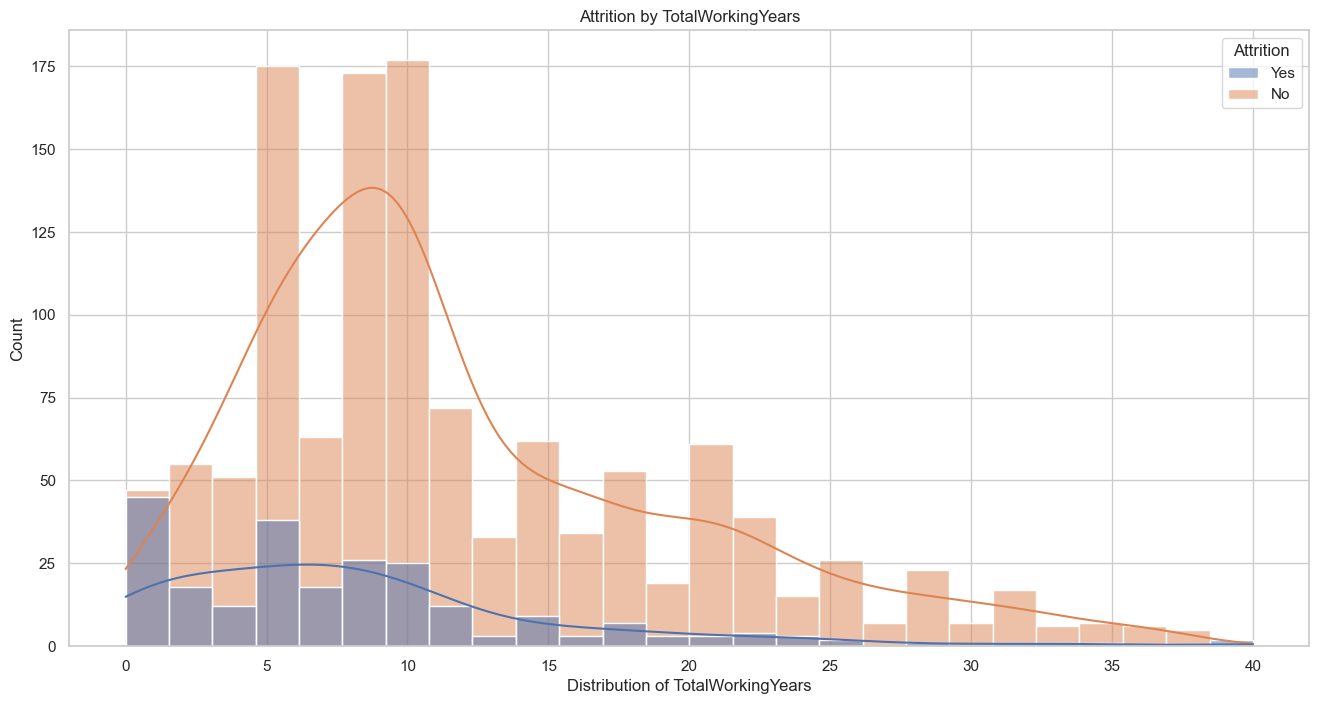

In [86]:
plt.figure(figsize=(16,8))
sns.histplot(x='TotalWorkingYears',data=df1,kde=True,hue='Attrition',color='red')
plt.title('Attrition by TotalWorkingYears')
plt.xlabel('Distribution of TotalWorkingYears')
plt.show()

Text(0, 0.5, 'Count as per TrainingTimesLastYear')

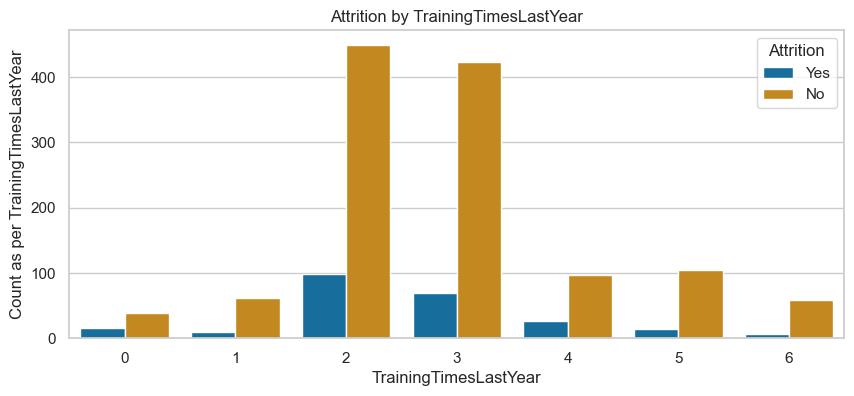

In [87]:
plt.figure(figsize=(10,4))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df1,palette='colorblind')
plt.title('Attrition by TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Count as per TrainingTimesLastYear')

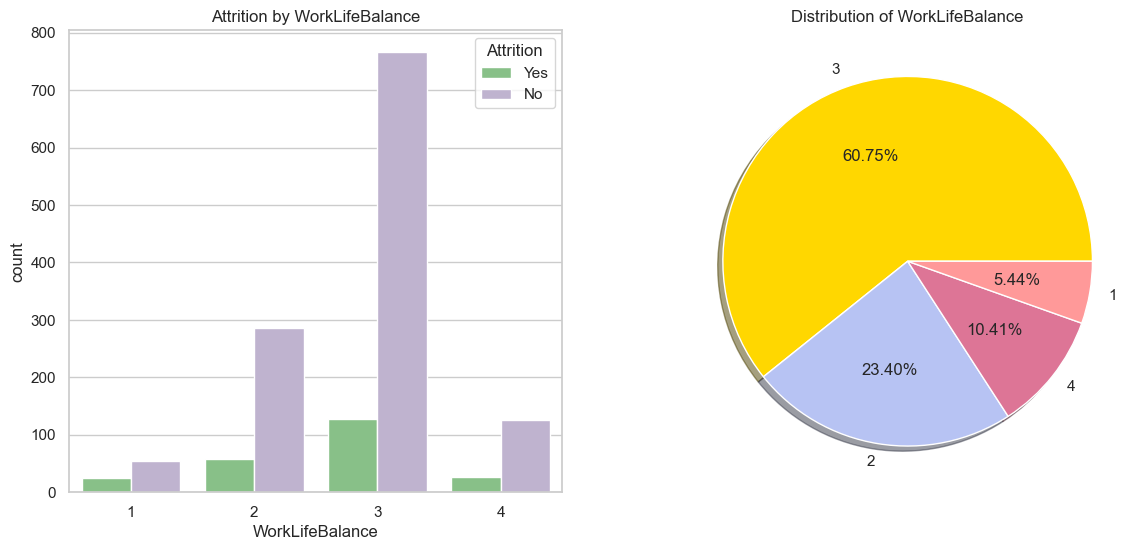

In [88]:
plt.subplots(1,2,figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df1,palette='Accent')
plt.title('Attrition by WorkLifeBalance')

plt.subplot(1,2,2)
colors=['gold','#B7C3F3','#DD7596','#ff9999','#66b3ff']
plt.pie(x=df1['WorkLifeBalance'].value_counts(),labels=df1['WorkLifeBalance'].value_counts().index,autopct='%0.2f%%',colors=colors,shadow=True,data=df1)
plt.title('Distribution of WorkLifeBalance')
plt.show()

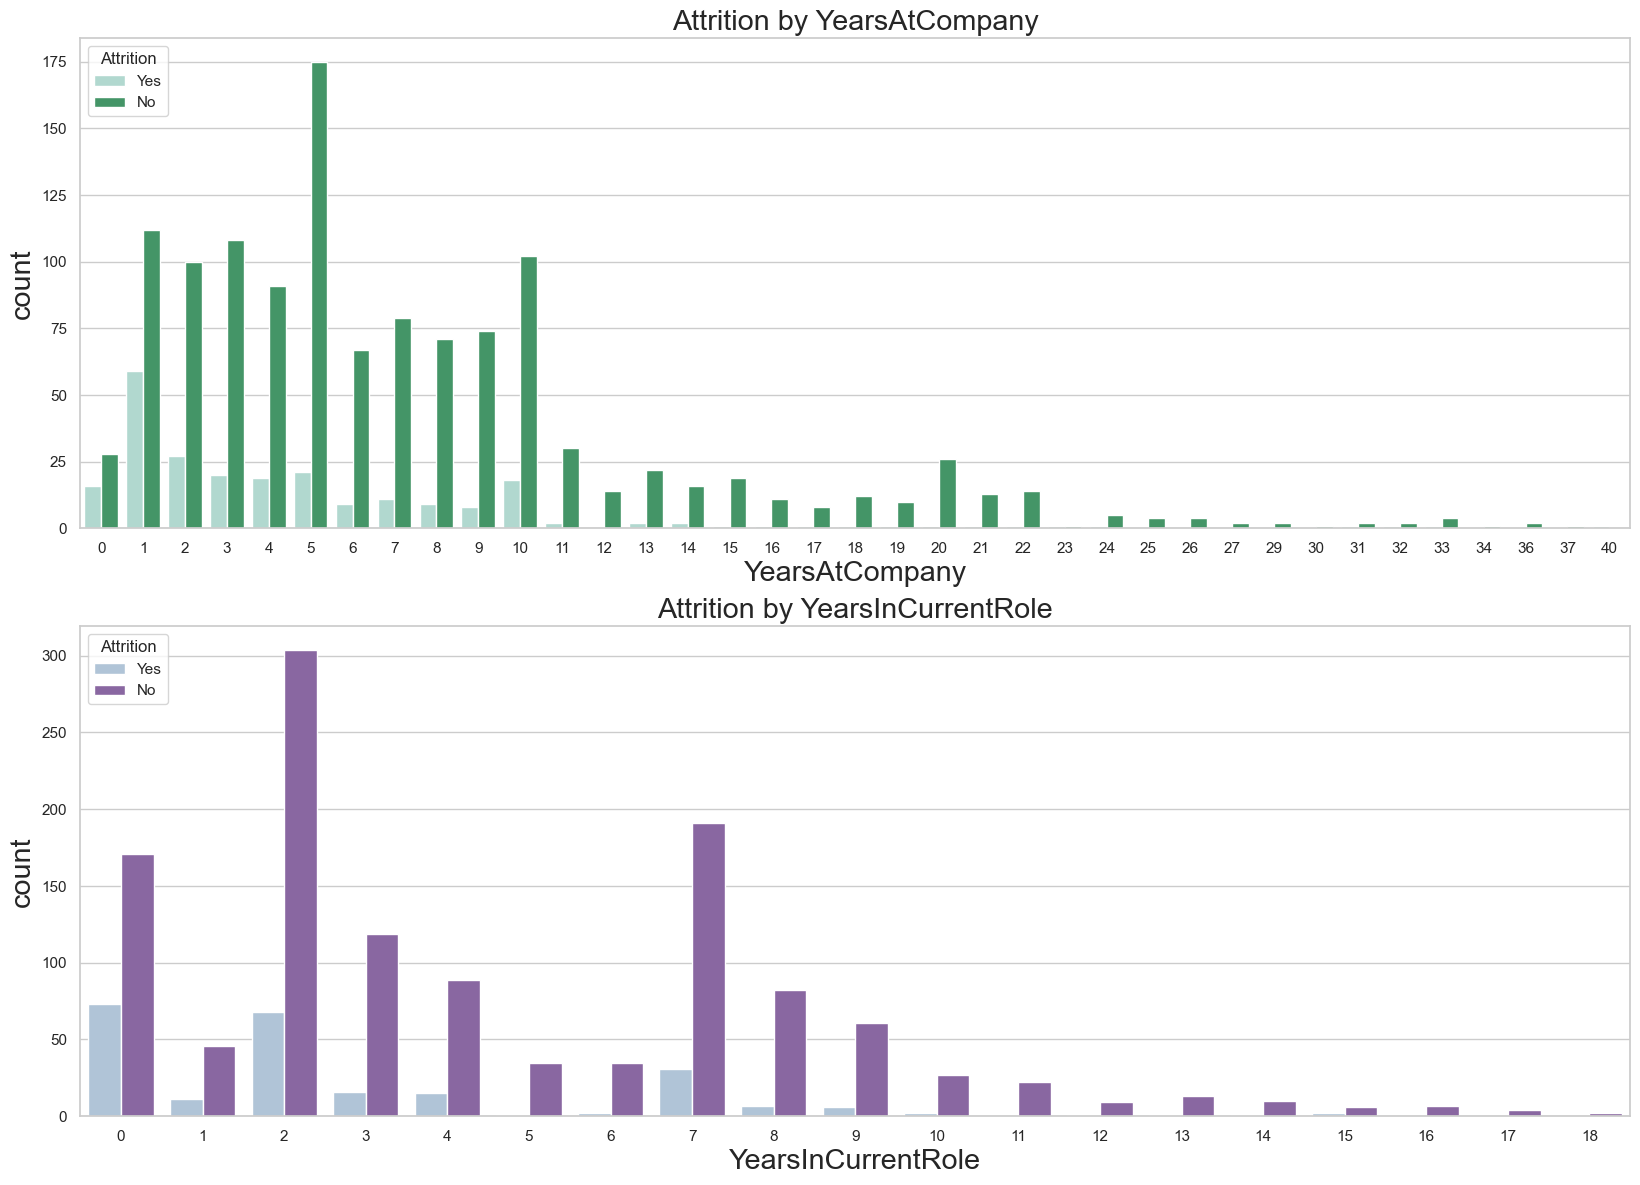

In [89]:
plt.subplots(2,1,figsize=(20,14))

plt.subplot(2,1,1)
sns.countplot(x='YearsAtCompany',data=df1,hue='Attrition',palette='BuGn')
plt.title('Attrition by YearsAtCompany',fontdict={'fontsize':'xx-large'})
plt.xlabel('YearsAtCompany',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,1,2)
sns.countplot(x='YearsInCurrentRole',data=df1,hue='Attrition',palette='BuPu')
plt.title('Attrition by YearsInCurrentRole',fontdict={'fontsize':'xx-large'})
plt.xlabel('YearsInCurrentRole',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})
plt.show()

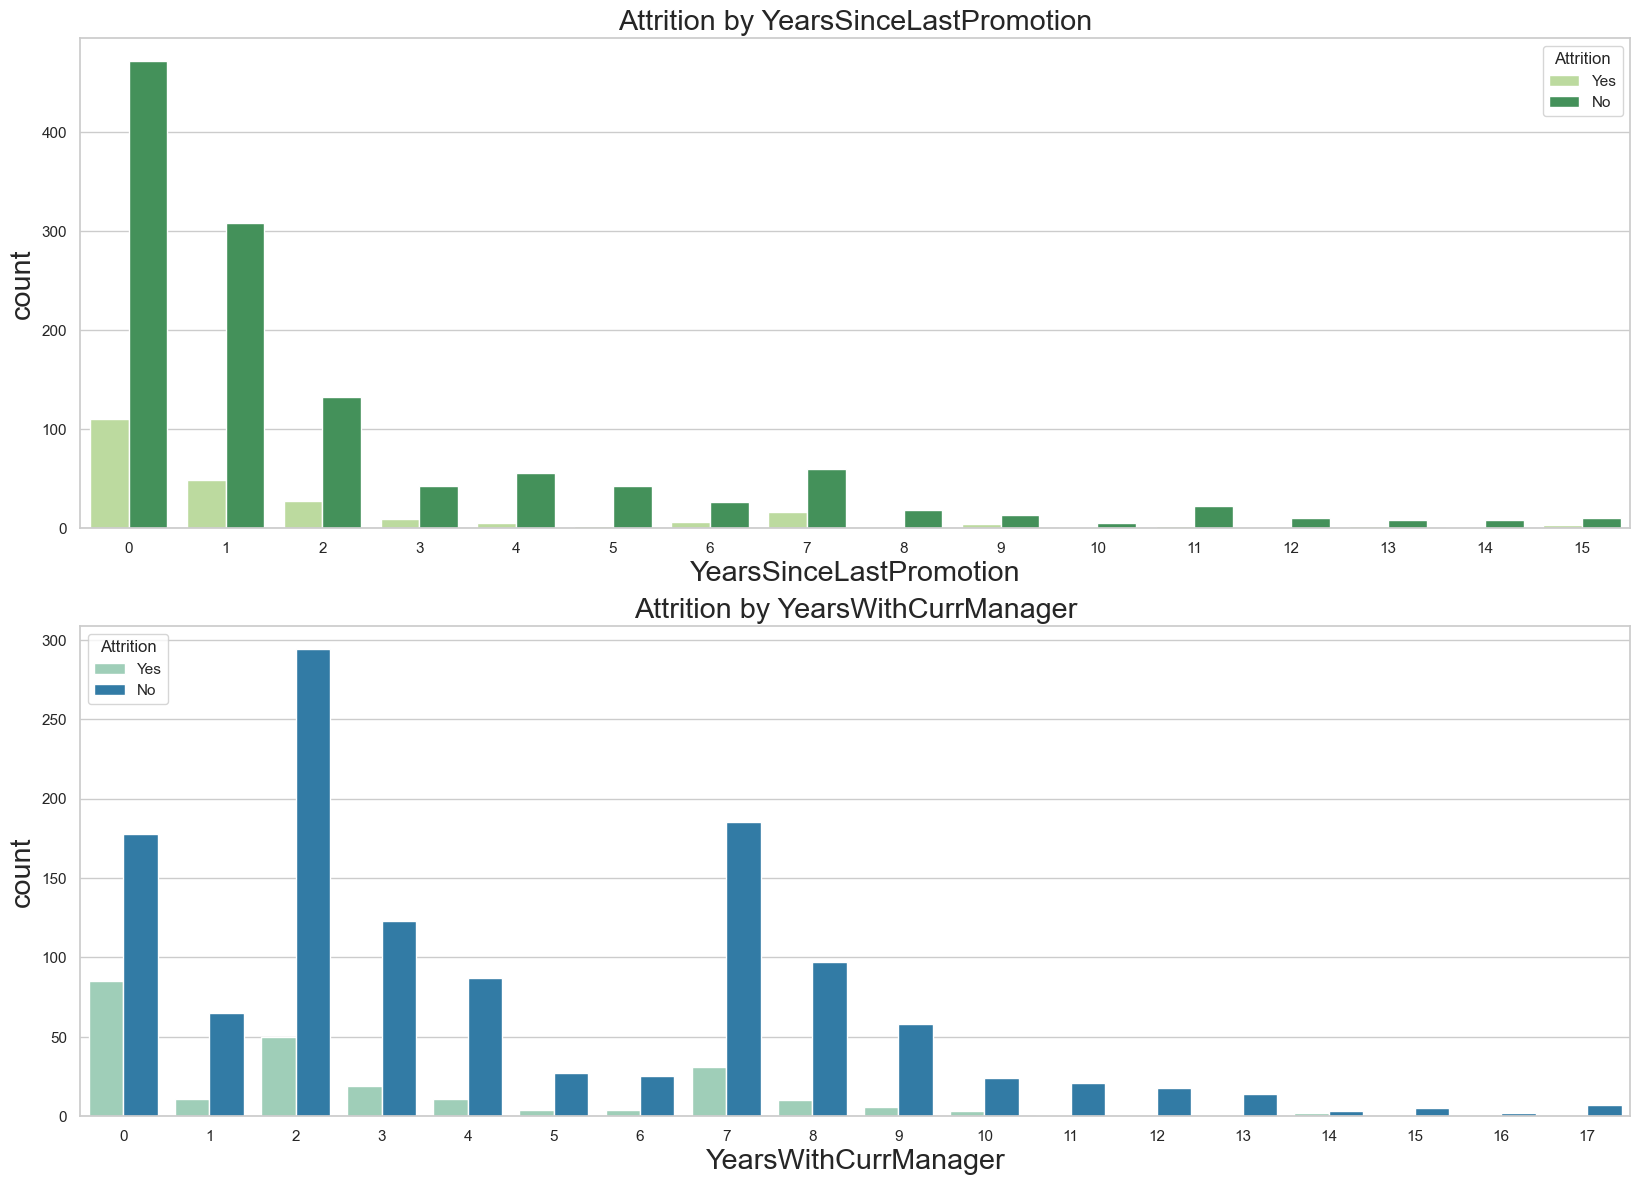

In [90]:
plt.subplots(2,1,figsize=(20,14))

plt.subplot(2,1,1)
sns.countplot(x='YearsSinceLastPromotion',data=df1,hue='Attrition',palette='YlGn')
plt.title('Attrition by YearsSinceLastPromotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('YearsSinceLastPromotion',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,1,2)
sns.countplot(x='YearsWithCurrManager',data=df1,hue='Attrition',palette='YlGnBu')
plt.title('Attrition by YearsWithCurrManager',fontdict={'fontsize':'xx-large'})
plt.xlabel('YearsWithCurrManager',fontdict={'fontsize':'xx-large'})
plt.ylabel('count',fontdict={'fontsize':'xx-large'})
plt.show()

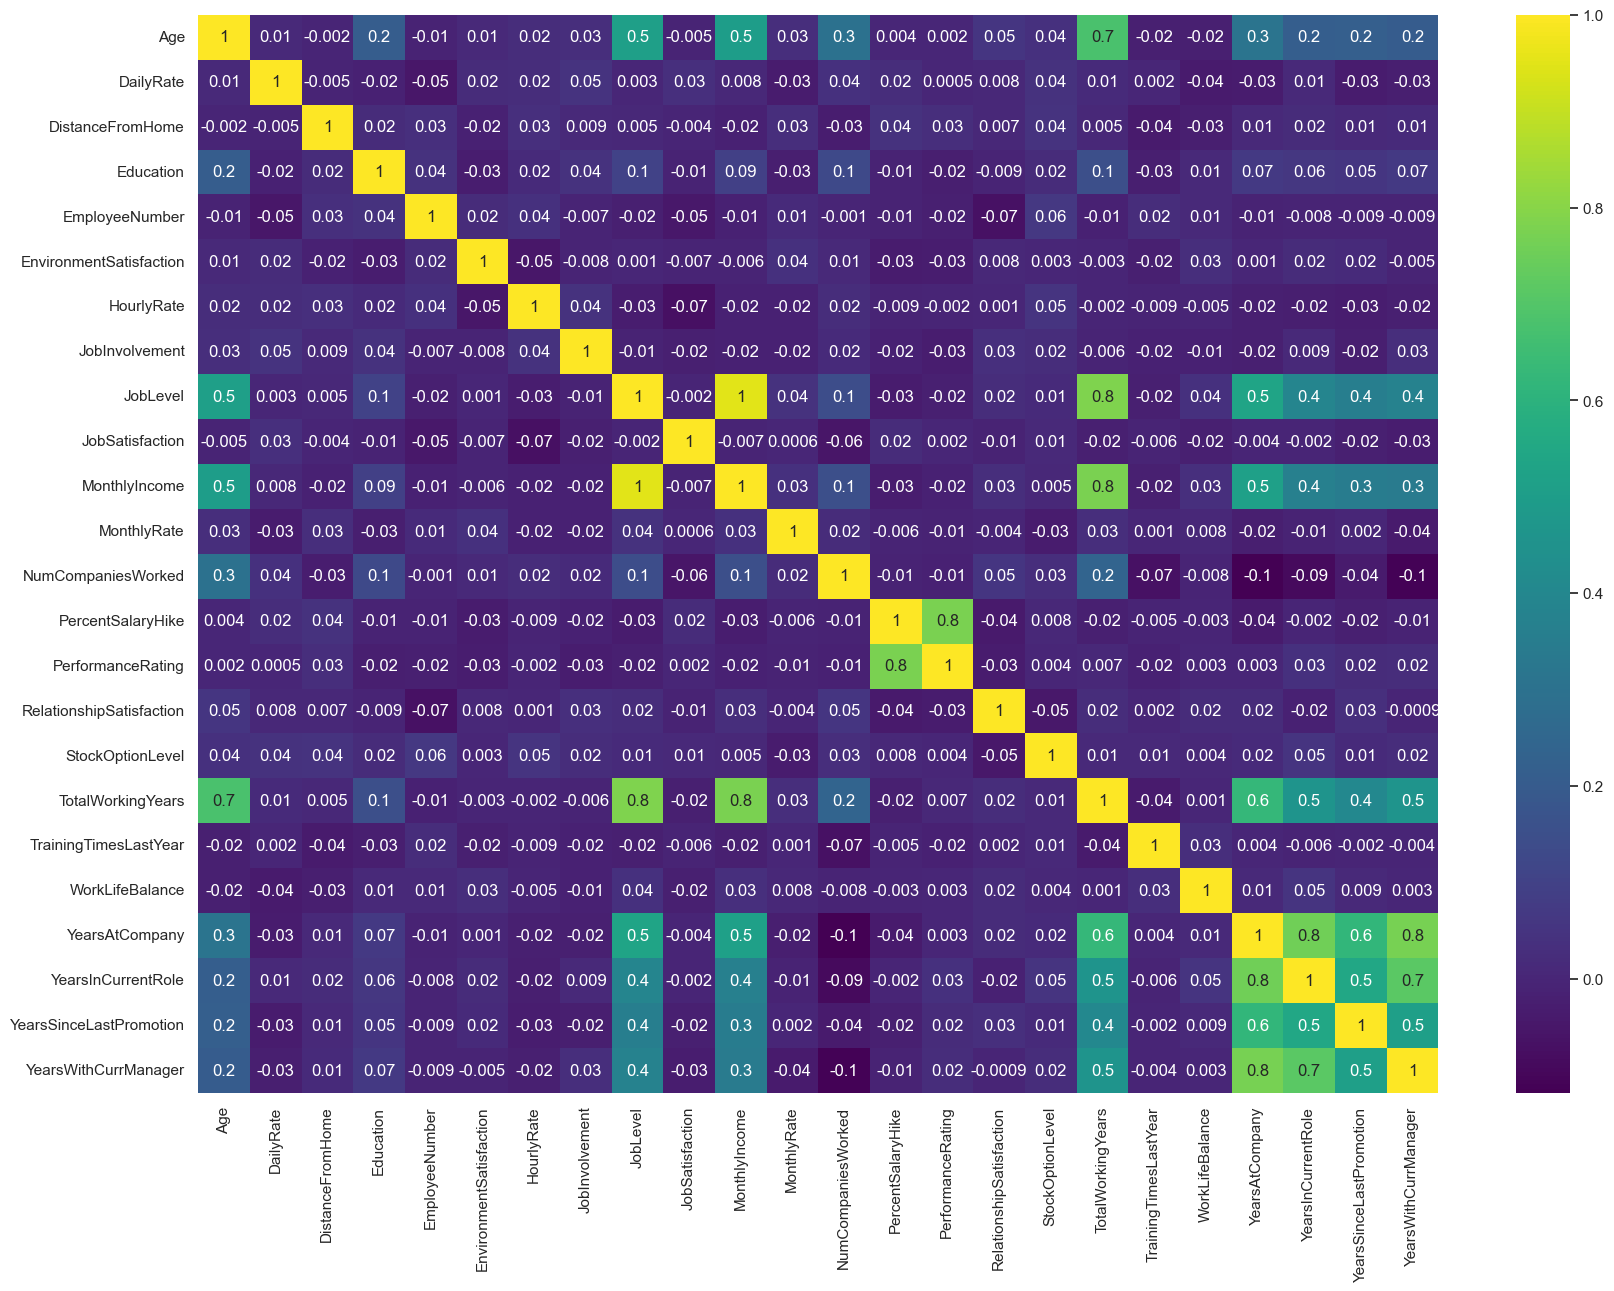

In [93]:
plt.figure(figsize=(20,14),dpi=100)
sns.heatmap(df1.corr(),annot=True,cmap='viridis',fmt='.1g',cbar=True)

plt.show()

# Summary:

1.  Age: count of employes are high who are fall between age group of 28 to 50 yeras old
2.  60% are male employees and 40% are female employees, 45.78% are mrried employees, 31.97% are single employees 
    and 22.24% are divorced employees
3.  71% employees needs to travel rarely for work
4.  18.8% employees have to travel frequently & 10.2% employees are non travel
5.  As per graphical representation the performance rating of employees  are quite low & its reflact on salary hike also
6.  41.22% employees are from Life Sciences background
7.  31.56% employees are from Medical back ground
8.  10.82% employees are from Marketing back ground
9.  8.98% employees has Technical Degree
10. 1.84% employees are from Human Resources
11. 5.58% employeesare from other category which is not defined
12. 22.18% epmloyees are from Sales Executive job role
13. 19.86% epmloyees are from Research Scientist job role
14. 17.62% epmloyees are from Laboratory Technician job role
15. 9.86% epmloyees are from Manufacturing Director job role
16. 8.91% epmloyees are from Healthcare Representative job role
17. 6.94% employees are Manager and 5.65% employees are Sales Representative
18. 5.44% employees are Research Director 
19. 3.54% employees are from Human Resources profile


# Conclusion:

As per obsevation there are many factors which may increase and decrease attrition rate in employees as per correlation model:
    1. Higher age of Employees
    2. Good enviroment satisfaction
    3. Good work life balance
    4. Good relatioship and working enviroment satisfaction
    5. More number of years with current role and with current manager
    6. Frequently business travel & also distance from home
    7. Good job involvement and job satisfaction as well.
    8. Overtime work